In [1]:
#Packages installieren und importieren
import pandas as pd


# Datenset einlesen und anschauen
film = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Dialogue.csv", encoding ="iso-8859-1")
film
film.info()
film.head(2)

# Film 1 separieren
film1= film[film["Chapter ID"] <=34]
film1.head(5)
film1.shape
film1.info()
film1.describe()
film1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   7444 non-null   int64 
 1   Chapter ID    7444 non-null   int64 
 2   Place ID      7444 non-null   int64 
 3   Character ID  7444 non-null   int64 
 4   Dialogue      7444 non-null   object
dtypes: int64(4), object(1)
memory usage: 290.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 884
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   885 non-null    int64 
 1   Chapter ID    885 non-null    int64 
 2   Place ID      885 non-null    int64 
 3   Character ID  885 non-null    int64 
 4   Dialogue      885 non-null    object
dtypes: int64(4), object(1)
memory usage: 41.5+ KB


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
...,...,...,...,...,...
880,881,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i..."
881,882,34,36,1,"But Hagrid, we're not allowed to do magic away..."
882,883,34,36,5,"I do. But your cousin don't, do he? Eh? Off y..."
883,884,34,36,3,"Feels strange to be going home, doesn't it?"


In [2]:
#tokenziation & stopwords
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords

import string
#print(stopwords.words('english'))
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

film1["3WordCountText"] = film1["Dialogue"].str.lower().apply(remove_punctuations).apply(word_tokenize)
film1["3WordCountText"]
film1

dialoge = film1["3WordCountText"].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)

film1["3withoutstopwords"] = filtered_tokens
film1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ACG\AppData\Local\Temp\ipykernel_8760\3022726422.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["3WordCountText"] = film1["Dialogue"].str.lower().apply(remove_punctuations).apply(word_tokenize)
C:\Users\ACG\AppData\Local\Temp\ipykernel_8760\3022726422.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["3withoutstopwords"] =

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,3WordCountText,3withoutstopwords
0,1,1,8,4,I should have known that you would be here...P...,"[i, should, have, known, that, you, would, be,...","[known, would, professor, mcgonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[i, m, afraid, so, professor, the, good, and, ...","[afraid, professor, good, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]"
...,...,...,...,...,...,...,...
880,881,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...","[oh, go, on, on, with, you, oh, listen, harry,...","[oh, go, oh, listen, harry, dolt, cousin, dudl..."
881,882,34,36,1,"But Hagrid, we're not allowed to do magic away...","[but, hagrid, we, re, not, allowed, to, do, ma...","[hagrid, allowed, magic, away, hogwarts, know]"
882,883,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...","[i, do, but, your, cousin, don, t, do, he, eh,...","[cousin, eh, go]"
883,884,34,36,3,"Feels strange to be going home, doesn't it?","[feels, strange, to, be, going, home, doesn, t...","[feels, strange, going, home]"


In [3]:
#stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language="english")

dialoge = film1["3withoutstopwords"] 
dialoge

PorterStem = []
for line in dialoge:
    for word in line:
        PorterStem.append(porter.stem(word))
PorterStem

LancasterStem = []
for line in dialoge:
    for word in line:
        LancasterStem.append(lancaster.stem(word))
LancasterStem

SnowballStem = []
for line in dialoge:
    for word in line:
        SnowballStem.append(snowball.stem(word))
SnowballStem


['known',
 'would',
 'professor',
 'mcgonagal',
 'good',
 'even',
 'professor',
 'dumbledor',
 'rumour',
 'true',
 'albus',
 'afraid',
 'professor',
 'good',
 'bad',
 'boy',
 'hagrid',
 'bring',
 'think',
 'wise',
 'trust',
 'hagrid',
 'someth',
 'import',
 'ah',
 'professor',
 'would',
 'trust',
 'hagrid',
 'life',
 'professor',
 'dumbledor',
 'sir',
 'professor',
 'mcgonagal',
 'problem',
 'trust',
 'hagrid',
 'sir',
 'littl',
 'tyke',
 'fell',
 'asleep',
 'fli',
 'bristol',
 'heh',
 'tri',
 'wake',
 'go',
 'albus',
 'realli',
 'think',
 'safe',
 'leav',
 'peopl',
 'watch',
 'day',
 'worst',
 'sort',
 'muggl',
 'imagin',
 'realli',
 'famili',
 'boy',
 'famous',
 'child',
 'world',
 'know',
 'name',
 'exact',
 'better',
 'grow',
 'away',
 'readi',
 'hagrid',
 'realli',
 'goodby',
 'good',
 'luck',
 'harri',
 'potter',
 'get',
 'wake',
 'cousin',
 'go',
 'zoo',
 'oh',
 'come',
 'birthday',
 'boy',
 'happi',
 'birthday',
 'son',
 'cook',
 'breakfast',
 'tri',
 'burn',
 'anyth',
 'yes',


PorterStemmer von M.F.Porter 1980 --> nur Englisch
SnowballStemmer von M.F.Porter als Verbesserung --> mehrere Sprachen
LancasterStemmer von C.D.Paice an der Lancaster Universität --> aggressivste Algorithmus, da iterativer Ansatz _> nicht so effizient wie Porter oder Snowball

Lemmatisierung Weiterentwicklung des Stemmings

In [4]:
#nur Stemmingmethoden gegenüberstellen
for line in dialoge:
    for word in line:
        print( [word,porter.stem(word), lancaster.stem(word),snowball.stem(word) ])

['known', 'known', 'known', 'known']
['would', 'would', 'would', 'would']
['professor', 'professor', 'profess', 'professor']
['mcgonagall', 'mcgonagal', 'mcgonagall', 'mcgonagal']
['good', 'good', 'good', 'good']
['evening', 'even', 'ev', 'even']
['professor', 'professor', 'profess', 'professor']
['dumbledore', 'dumbledor', 'dumbl', 'dumbledor']
['rumours', 'rumour', 'rumo', 'rumour']
['true', 'true', 'tru', 'true']
['albus', 'albu', 'alb', 'albus']
['afraid', 'afraid', 'afraid', 'afraid']
['professor', 'professor', 'profess', 'professor']
['good', 'good', 'good', 'good']
['bad', 'bad', 'bad', 'bad']
['boy', 'boy', 'boy', 'boy']
['hagrid', 'hagrid', 'hagrid', 'hagrid']
['bringing', 'bring', 'bring', 'bring']
['think', 'think', 'think', 'think']
['wise', 'wise', 'wis', 'wise']
['trust', 'trust', 'trust', 'trust']
['hagrid', 'hagrid', 'hagrid', 'hagrid']
['something', 'someth', 'someth', 'someth']
['important', 'import', 'import', 'import']
['ah', 'ah', 'ah', 'ah']
['professor', 'profess

In [5]:
#Lemmitization
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
wnl = WordNetLemmatizer() 

Lemi_Stem = []
for line in dialoge:
    Lemi_Line =[]
    for word in line: 
            Lemi_Line.append(wnl.lemmatize(word))  
    Lemi_Stem.append(Lemi_Line)
Lemi_Stem 


#Stemming und lemmitization gegenüberstellen
for line in dialoge:
    for word in line:
        print( [word , porter.stem(word), lancaster.stem(word),snowball.stem(word), wnl.lemmatize(word)])

film1["Lemmitization"] = Lemi_Stem
film1

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['known', 'known', 'known', 'known', 'known']
['would', 'would', 'would', 'would', 'would']
['professor', 'professor', 'profess', 'professor', 'professor']
['mcgonagall', 'mcgonagal', 'mcgonagall', 'mcgonagal', 'mcgonagall']
['good', 'good', 'good', 'good', 'good']
['evening', 'even', 'ev', 'even', 'evening']
['professor', 'professor', 'profess', 'professor', 'professor']
['dumbledore', 'dumbledor', 'dumbl', 'dumbledor', 'dumbledore']
['rumours', 'rumour', 'rumo', 'rumour', 'rumour']
['true', 'true', 'tru', 'true', 'true']
['albus', 'albu', 'alb', 'albus', 'albus']
['afraid', 'afraid', 'afraid', 'afraid', 'afraid']
['professor', 'professor', 'profess', 'professor', 'professor']
['good', 'good', 'good', 'good', 'good']
['bad', 'bad', 'bad', 'bad', 'bad']
['boy', 'boy', 'boy', 'boy', 'boy']
['hagrid', 'hagrid', 'hagrid', 'hagrid', 'hagrid']
['bringing', 'bring', 'bring', 'bring', 'bringing']
['think', 'think', 'think', 'think', 'think']
['wise', 'wise', 'wis', 'wise', 'wise']
['trust', '

C:\Users\ACG\AppData\Local\Temp\ipykernel_8760\4237545528.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["Lemmitization"] = Lemi_Stem


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,3WordCountText,3withoutstopwords,Lemmitization
0,1,1,8,4,I should have known that you would be here...P...,"[i, should, have, known, that, you, would, be,...","[known, would, professor, mcgonagall]","[known, would, professor, mcgonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours...","[good, evening, professor, dumbledore, rumour,..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[i, m, afraid, so, professor, the, good, and, ...","[afraid, professor, good, bad]","[afraid, professor, good, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy],[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]","[hagrid, bringing]"
...,...,...,...,...,...,...,...,...
880,881,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...","[oh, go, on, on, with, you, oh, listen, harry,...","[oh, go, oh, listen, harry, dolt, cousin, dudl...","[oh, go, oh, listen, harry, dolt, cousin, dudl..."
881,882,34,36,1,"But Hagrid, we're not allowed to do magic away...","[but, hagrid, we, re, not, allowed, to, do, ma...","[hagrid, allowed, magic, away, hogwarts, know]","[hagrid, allowed, magic, away, hogwarts, know]"
882,883,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...","[i, do, but, your, cousin, don, t, do, he, eh,...","[cousin, eh, go]","[cousin, eh, go]"
883,884,34,36,3,"Feels strange to be going home, doesn't it?","[feels, strange, to, be, going, home, doesn, t...","[feels, strange, going, home]","[feel, strange, going, home]"


In [6]:
#part of speech tagging (POS)
nltk.download('averaged_perceptron_tagger')
nltk.download("maxent_ne_chunker")

dialoge = film1["3withoutstopwords"]
dialoge

pos_tag = []
for line in dialoge:
    for word in line:
        pos_tag.append(nltk.pos_tag([word]))
pos_tag


# from nltk import ne_chunk

# ne = []
# for line in pos_tag:
#     for word in pos_tag:
#         ne.append(nltk.ne_chunk(pos_tag))
# print(ne)

# chunk = ne_chunk(pos_tag)
# chunk 
 
#chunking


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


[[('known', 'VBN')],
 [('would', 'MD')],
 [('professor', 'NN')],
 [('mcgonagall', 'NN')],
 [('good', 'JJ')],
 [('evening', 'VBG')],
 [('professor', 'NN')],
 [('dumbledore', 'NN')],
 [('rumours', 'NNS')],
 [('true', 'JJ')],
 [('albus', 'NN')],
 [('afraid', 'NN')],
 [('professor', 'NN')],
 [('good', 'JJ')],
 [('bad', 'JJ')],
 [('boy', 'NN')],
 [('hagrid', 'NN')],
 [('bringing', 'VBG')],
 [('think', 'NN')],
 [('wise', 'NN')],
 [('trust', 'NN')],
 [('hagrid', 'NN')],
 [('something', 'NN')],
 [('important', 'JJ')],
 [('ah', 'NN')],
 [('professor', 'NN')],
 [('would', 'MD')],
 [('trust', 'NN')],
 [('hagrid', 'NN')],
 [('life', 'NN')],
 [('professor', 'NN')],
 [('dumbledore', 'NN')],
 [('sir', 'NN')],
 [('professor', 'NN')],
 [('mcgonagall', 'NN')],
 [('problems', 'NNS')],
 [('trust', 'NN')],
 [('hagrid', 'NN')],
 [('sir', 'NN')],
 [('little', 'JJ')],
 [('tyke', 'NN')],
 [('fell', 'VBD')],
 [('asleep', 'NN')],
 [('flying', 'VBG')],
 [('bristol', 'NN')],
 [('heh', 'NN')],
 [('try', 'NN')],
 [(

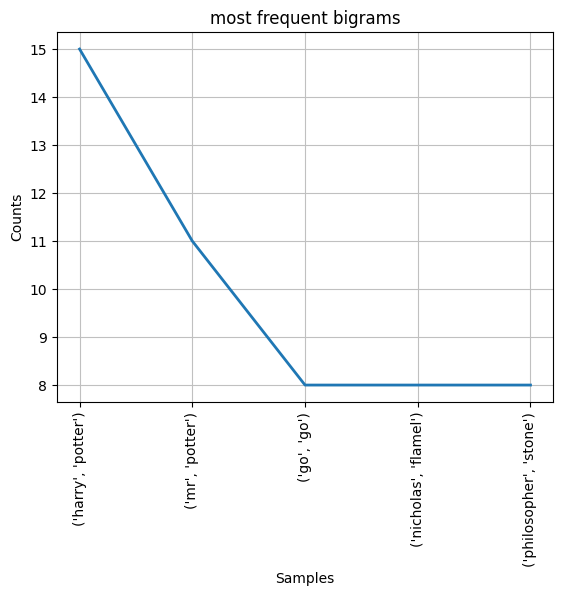

<AxesSubplot: title={'center': 'most frequent bigrams'}, xlabel='Samples', ylabel='Counts'>

In [7]:
#ngrams
from nltk.util import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt


dialoge = film1["3withoutstopwords"]
dialoge.tolist()
biGram = []
for line in dialoge:
    biGram.append(ngrams(line, 2))
biGram


fdist = FreqDist()
for line in biGram:
    for word in line:
        fdist[word] +=1 
nGram_freq = fdist
nGram_freq

nGram_freq.plot(5,title="most frequent bigrams")
#Barplot?


#len(biGram)


In [8]:
#wie oft kommt ein Wort vor
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#mit allen Wörtern
dialoge = film1["3WordCountText"]
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
Token_freq = fdist
Token_freq.most_common(5)

#ohne Stopwords
dialoge = film1["3withoutstopwords"]
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
ohnestopwords_freq = fdist
freq = ohnestopwords_freq.most_common(5)


#fdist.plot(5, title = "most frequent top 5 Words")

print([Token_freq.most_common(5), ohnestopwords_freq.most_common(5)])

#für Harry
Charakter = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Characters.csv", encoding ="iso-8859-1")
Charakter

df = pd.merge(film1, Charakter, on = "Character ID")
df

harry = df[df["Character Name"] == "Harry Potter"]
harry
fdistH = FreqDist()
for line in harry["3withoutstopwords"]:
    for word in line:
         fdistH[word] +=1        
commonwords_freq = fdistH
print(commonwords_freq)
freqH = commonwords_freq.most_common(50)
freqH

[[('you', 392), ('i', 297), ('the', 288), ('s', 260), ('to', 241)], [('harry', 95), ('go', 58), ('oh', 54), ('know', 51), ('one', 49)]]
<FreqDist with 435 samples and 846 outcomes>


[('hagrid', 21),
 ('know', 16),
 ('one', 13),
 ('ron', 13),
 ('go', 11),
 ('like', 10),
 ('think', 10),
 ('snape', 10),
 ('see', 9),
 ('get', 9),
 ('hermione', 9),
 ('whoa', 9),
 ('stone', 9),
 ('got', 8),
 ('come', 8),
 ('never', 7),
 ('mean', 7),
 ('let', 7),
 ('dragon', 7),
 ('voldemort', 7),
 ('day', 6),
 ('flamel', 6),
 ('yes', 5),
 ('parents', 5),
 ('minute', 5),
 ('gone', 5),
 ('harry', 5),
 ('excuse', 5),
 ('trying', 5),
 ('something', 5),
 ('going', 5),
 ('sorry', 4),
 ('people', 4),
 ('well', 4),
 ('knew', 4),
 ('hey', 4),
 ('give', 4),
 ('back', 4),
 ('okay', 4),
 ('could', 4),
 ('oh', 4),
 ('sir', 4),
 ('dumbledore', 4),
 ('slytherin', 4),
 ('malfoy', 4),
 ('troll', 4),
 ('nicholas', 4),
 ('right', 4),
 ('ahh', 3),
 ('hogwarts', 3)]

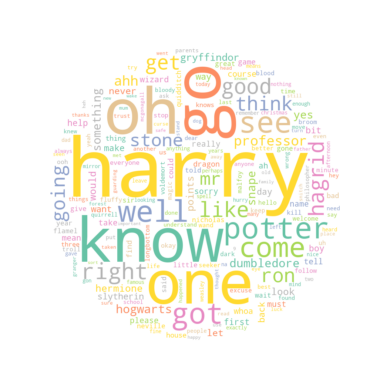

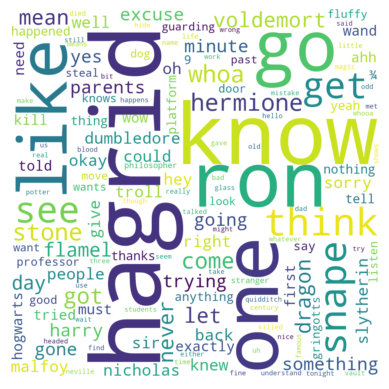

In [9]:
#Wordcloud für alle
import numpy as np
from wordcloud import WordCloud
x,y = np.ogrid[:1000,:1000]
mask = (x-500)**2 +(y-500)**2> 400**2
mask = 255*mask.astype(int)

word_cloud = WordCloud( mask = mask, background_color= "white", colormap = "Set2", width = 800, height = 400).generate_from_frequencies(ohnestopwords_freq)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#wordclound für Harry
word_cloud = WordCloud(background_color="white", width = 1000, height = 1000, min_font_size = 15).generate_from_frequencies(commonwords_freq)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [10]:
import collections
import matplotlib

# df
# df["3withoutstopwords"]
# wordcount = {}
# list = []

harrylist =[]
for x in harry["3withoutstopwords"]:
    harrylist.extend(x)

# for word in list:
#     if word not in wordcount:
#         wordcount[word] = 1
#     else:
#         wordcount[word] +=1

# wordcount

# Counts = collections.Counter(wordcount)
# Counts

wordcount = {}
for word in harrylist:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
wordcount

Counts = collections.Counter(wordcount)
Counts
# for word, count in Counts.most_common(20):
#     print(word, ":", count)


photo1 = Image.open("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/ProjektProgramm/AnalyseAnja/PotterZeichen.jpg")

maskhp = np.array(photo1)

plt.imshow(photo1)

photo2 = Image.open("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/ProjektProgramm/AnalyseAnja/harry-potter-silhouettes-4.jpg")

maskharry = np.array(photo2)

plt.imshow(photo2)

colorslist = ["#102A7B", "#104A7B"]  #hattps:\\htmlcolorcodes.com
ColorMap = matplotlib.colors.ListedColormap(colorslist)
wordcloud = WordCloud(background_color= "white", contour_width = 1, contour_color = "steelblue",max_words = 50, mask = maskharry, width = 1000, height = 1000, min_font_size = 15, colormap = ColorMap)
wordcloud.generate_from_frequencies(commonwords_freq)
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.figure()
plt.show()
#amueller.github.io
#problem, warum nur so wenige?

NameError: name 'Image' is not defined

<FreqDist with 1291 samples and 3642 outcomes>


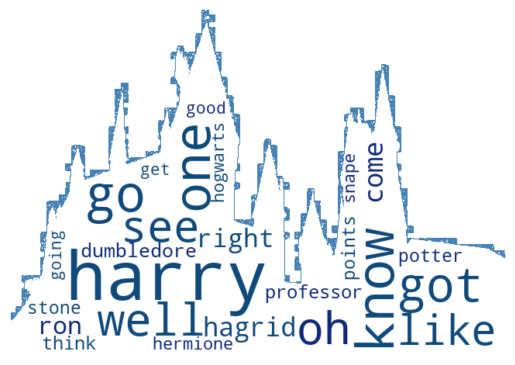

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gryffindor meiste Wörter
#siloette falsch
df

gryffindor = df[df["House"] == "Gryffindor"]
gryffindor
fdistH = FreqDist()
for line in gryffindor["3withoutstopwords"]:
    for word in line:
         fdistH[word] +=1        
wordcounter = fdistH
print(wordcounter)
freqG =wordcounter.most_common(50)
freqG

photo3 = Image.open("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/ProjektProgramm/AnalyseAnja/hogwarts.jpg")

maskgryffindor = np.array(photo3)

plt.imshow(photo3)

colorslist = ["#102A7B", "#104A7B"]  #hattps:\\htmlcolorcodes.com
ColorMap = matplotlib.colors.ListedColormap(colorslist)
wordcloud = WordCloud(background_color= "white", contour_width = 1, contour_color = "steelblue",max_words = 50, mask = maskgryffindor, width = 1000, height = 1000, min_font_size = 15, colormap = ColorMap)
wordcloud.generate_from_frequencies(wordcounter)
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.figure()
plt.show()

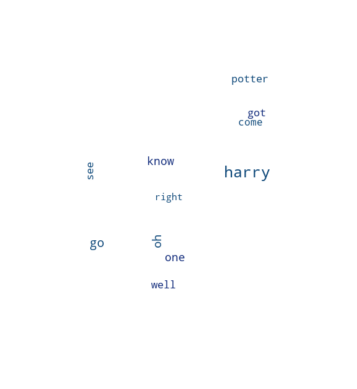

<Figure size 640x480 with 0 Axes>

In [ ]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

df
df["3withoutstopwords"]
wordcount = {}
list = []

for x in df["3withoutstopwords"]:
    list.extend(x)

for word in list:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] +=1

wordcount

Counts = collections.Counter(wordcount)
Counts

# for word, count in Counts.most_common(20):
#     print(word, ":", count)


photo = Image.open("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/ProjektProgramm/AnalyseAnja/PotterZeichen.jpg")

maskhp = np.array(photo)

plt.imshow(photo)


colorslist = ["#102A7B", "#104A7B"]  #hattps:\\htmlcolorcodes.com
ColorMap = matplotlib.colors.ListedColormap(colorslist)
wordcloud = WordCloud(background_color= "white", max_words = 50, mask = maskhp, width = 500, height = 500, min_font_size = 15, colormap = ColorMap)
wordcloud.generate_from_frequencies(wordcount)
#wordcloud = WordCloud(mask = Mask, margin = 10, max_words = 500, min_font_size= 12, max_font_size = 15, random_state = 1, background_color= "white", colormap = ColorMap, width = 1000, height = 1000).generate_from_frequencies(commonwords_freq)
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.figure()
plt.show()

#problem, warum nur so wenige

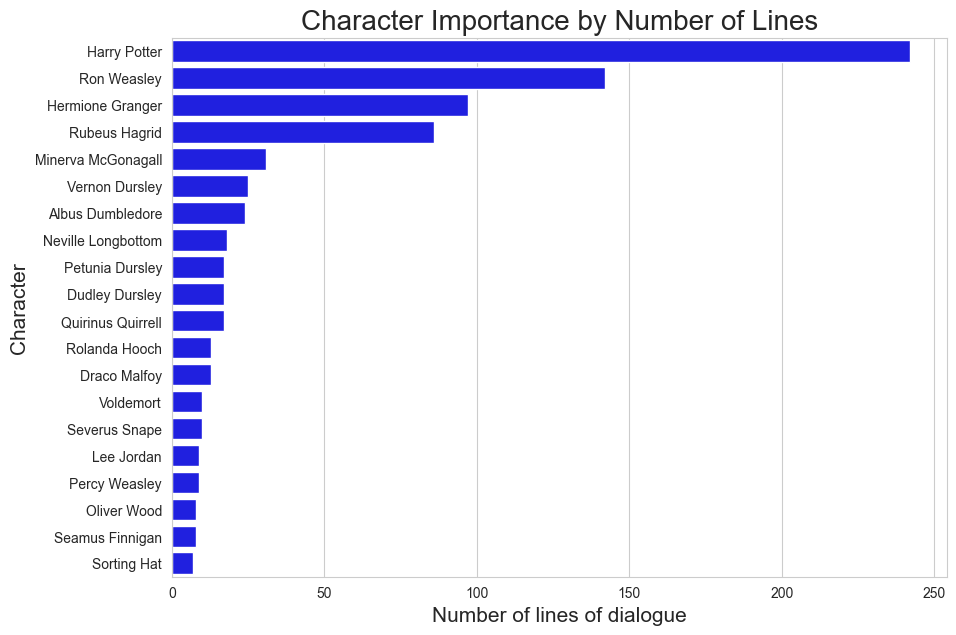

C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\1570430128.py:35: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x = "wordcount", y ="CharacterName", data = totalword, order = totalword.sort_values("wordcount",ascending = False).CharacterName[0:20], orient = "h", color = "Blue")


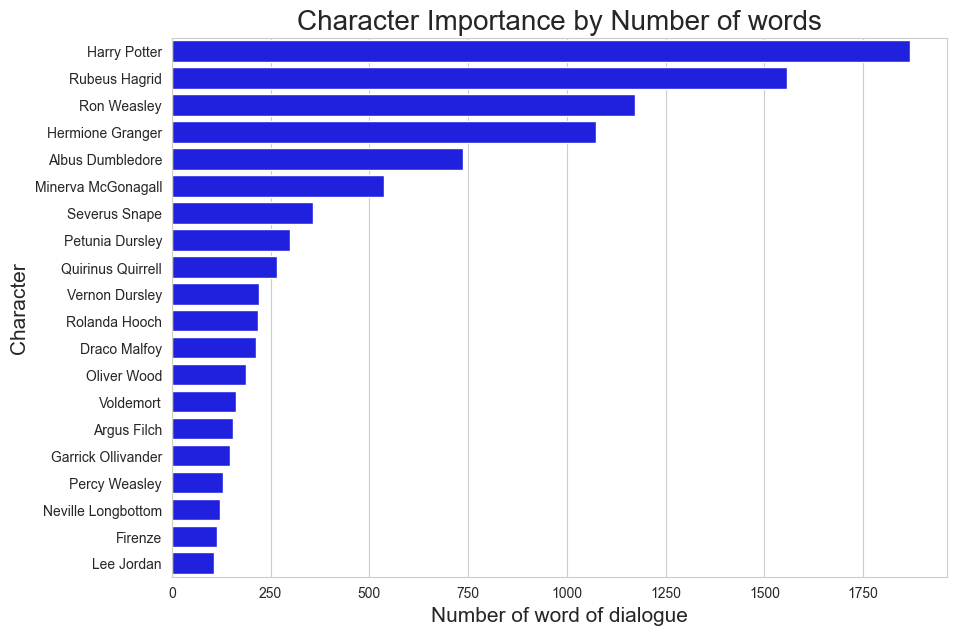

In [ ]:
#Redeanteile der Charaktere pro Satz
import numpy 
import seaborn as sns
from collections import Counter
import re

charaktere = df["Character Name"].value_counts()
charaktere

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.countplot(y ="Character Name", data = df, order = df["Character Name"].value_counts().iloc[:20].index, color="blue")
plt.xlabel("Number of lines of dialogue", fontsize = 15)
plt.ylabel("Character", fontsize = 15)
plt.title("Character Importance by Number of Lines", fontsize = 20)
plt.show()

#Redeanteil der Charaktere pro Wort
dialoge = df["3WordCountText"]
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df["wordcount"] = wordcount
df

totalword = df.groupby("Character Name", as_index= False).wordcount.sum()
totalword = totalword.rename(columns ={ totalword.columns[0]: "CharacterName"})
totalword

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x = "wordcount", y ="CharacterName", data = totalword, order = totalword.sort_values("wordcount",ascending = False).CharacterName[0:20], orient = "h", color = "Blue")
plt.xlabel("Number of word of dialogue", fontsize = 15)
plt.ylabel("Character", fontsize = 15)
plt.title("Character Importance by Number of words", fontsize = 20)
plt.show()

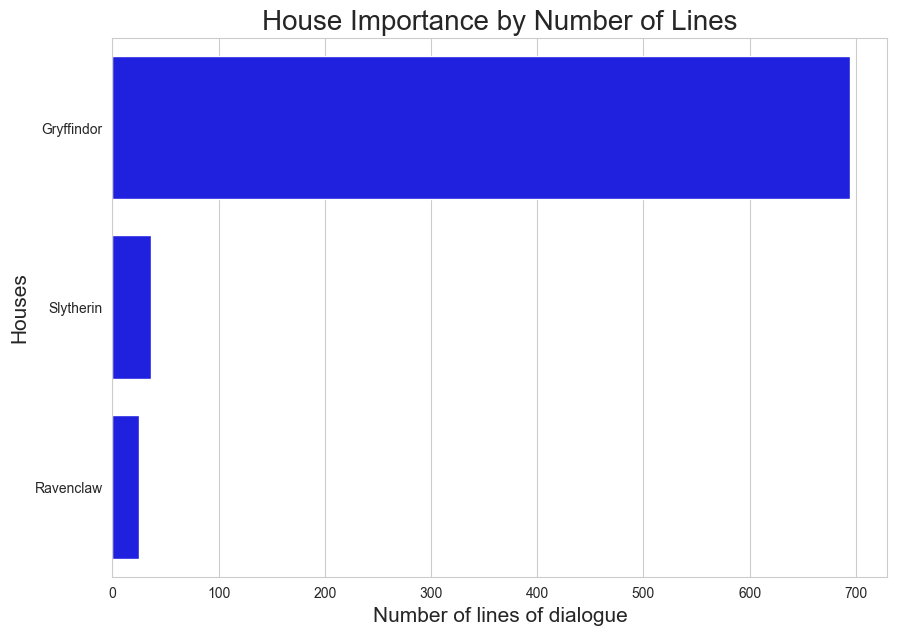

In [ ]:
#Redeanteile der Häuser
import matplotlib.pyplot as plt
import numpy as np
house_Redeanteil = df["House"].value_counts()
house_Redeanteil
#ginge auch aber anderes schöner:
# plt.bar(x=["Gryffindor", "Slytherin","Ravenclaw"] , height= house_Redeanteil)
# plt.show()

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.countplot(y ="House", data = df, order = df["House"].value_counts().iloc[:20].index, color="blue")
plt.xlabel("Number of lines of dialogue", fontsize = 15)
plt.ylabel("Houses", fontsize = 15)
plt.title("House Importance by Number of Lines", fontsize = 20)
plt.show()

In [ ]:
#häufigste Zaubersprüche
import collections
Zaubersprüche = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Spells.csv", encoding ="iso-8859-1")
Zaubersprüche =Zaubersprüche.rename(columns ={ Zaubersprüche.columns[0]: "Spell ID"})
Zaubersprüche

def extract_spells(row):
    words = row["3withoutstopwords"]
    
    spells=[]

    for i in range(len(words)-1):
        spell = words[i]+ " " + words[i+1]

        if spell in Zaubersprüche["Incantation"].values:
            spells.append(spell)
    return spells


df["spells"] = df.apply(extract_spells,axis =1)

spell_counts = df["spells"].value_counts()

print(spell_counts.head())

df.to_csv("dialoguewithspellsAnja.csv", columns=["Character ID", "spells"])



[]    885
Name: spells, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\3564588645.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DialogHarry["SentimentScore"] = scores
C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\3564588645.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("compound

-0.035501721986438264

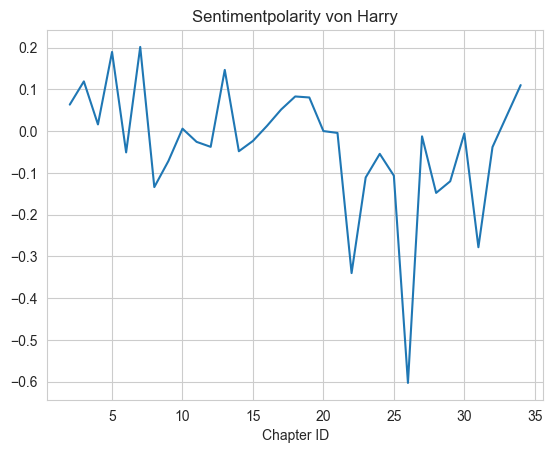

In [ ]:
#SentimentAnalyse von Harry pro Chapter
DialogHarry= film1[film1["Character ID"]==1]
DialogHarry

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download("vader_lexicon")
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()

scores = DialogHarry.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
DialogHarry["SentimentScore"] = scores
DialogHarry
DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("compound"))
DialogHarry["PosScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("pos"))
DialogHarry["NegScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neg"))
DialogHarry["NeuScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neu"))
DialogHarry

Chaptersentiment = DialogHarry.groupby("Chapter ID").mean()["CompScore"]
Chaptersentiment
#### PROBLEM: CHAPTER 1 hat Harry nix gesprochen
Chaptersentiment.plot(x= "Chapter ID", y = "CompScore", title="Sentimentpolarity von Harry")

#gesamte HarryScore über alle Kapitel
score = Chaptersentiment.mean()
score # = -0.035501721986438264


In [ ]:
#SentimentAnalyse über den gesamten Film
scores = film1.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
film1["SentimentScore"] = scores
film1["CompScore"] = film1.SentimentScore.apply(lambda x: x.get("compound"))
film1["PosScore"] = film1.SentimentScore.apply(lambda x: x.get("pos"))
film1["NegScore"] = film1.SentimentScore.apply(lambda x: x.get("neg"))
film1["NeuScore"] = film1.SentimentScore.apply(lambda x: x.get("neu"))
film1
score = film1.mean()["CompScore"]
score # = 0.04966960451977401

C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\4205520241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["SentimentScore"] = scores
C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\4205520241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["CompScore"] = film1.SentimentScore.apply(lambda x: x.get("compound"))
C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\4205520241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

0.04966960451977401

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\2650111663.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= "CompScore" ,y ="CharacterName", data = sentiment_characters, order = sentiment_characters.sort_values("CompScore", ascending =False).CharacterName[0:25], color="blue")


           CharacterName  CompScore
0       Albus Dumbledore   0.356476
1            Argus Filch  -0.028883
2           Draco Malfoy   0.001244
3         Dudley Dursley   0.011289
4        Filius Flitwick   0.601375
5                Firenze  -0.101175
6           Fred Weasley  -0.021250
7           Harry Potter  -0.038872
8       Hermione Granger   0.012205
9             Lee Jordan   0.107425
10    Minerva McGonagall   0.278590
11  Nearly Headless Nick   0.022925
12    Neville Longbottom  -0.268313
13           Oliver Wood   0.086129
14         Percy Weasley   0.303378
15       Petunia Dursley   0.215564
16     Quirinus Quirrell   0.112431
17         Rolanda Hooch   0.316650
18           Ron Weasley   0.006272
19         Rubeus Hagrid   0.023758
20       Seamus Finnigan  -0.142300
21         Severus Snape   0.388222
22           Sorting Hat   0.399800
23        Vernon Dursley   0.082373
24             Voldemort  -0.319380


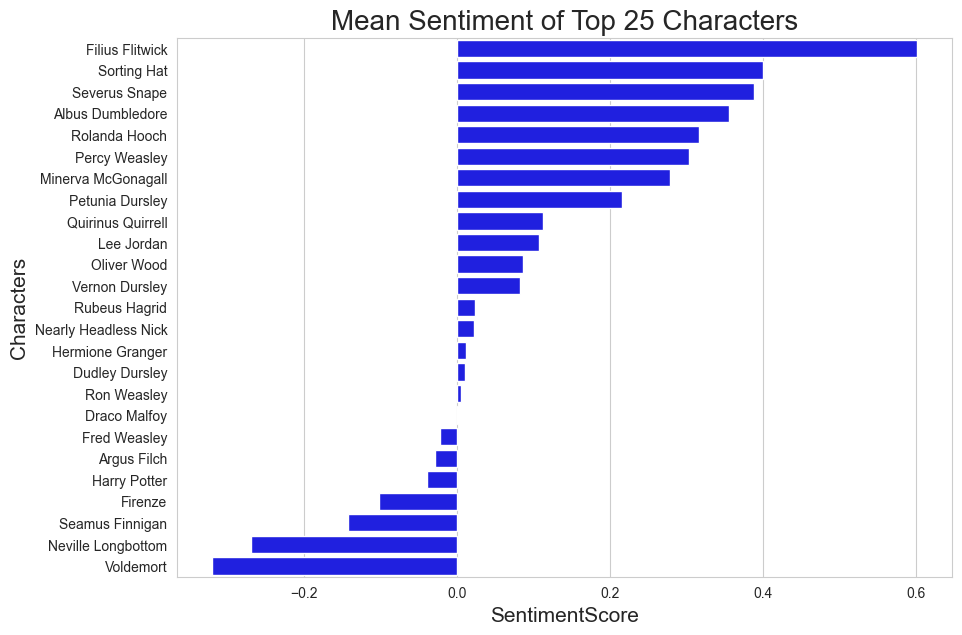

In [ ]:
#Sentiment von allen Charakteren
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download("vader_lexicon")
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()
df

dialoge = df["3withoutstopwords"]
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df["wordcountwithoutstopwords"] = wordcount
df
filtered = df[df["wordcountwithoutstopwords"]>2]
counts = filtered["Character Name"].value_counts()
counts = counts[0:25]
counts = pd.DataFrame(counts)
counts["Count"] =counts["Character Name"]
counts["Character Name"]= counts.index
counts = counts.reset_index()
counts = counts.drop("index",axis =1)
counts

filtered = filtered[filtered["Character Name"].isin(counts["Character Name"])]
filtered
scores = filtered.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
filtered["SentimentScore"] = scores

filtered["CompScore"] = filtered.SentimentScore.apply(lambda x: x.get("compound"))
filtered["PosScore"] = filtered.SentimentScore.apply(lambda x: x.get("pos"))
filtered["NegScore"] = filtered.SentimentScore.apply(lambda x: x.get("neg"))
filtered["NeuScore"] = filtered.SentimentScore.apply(lambda x: x.get("neu"))
filtered
sentiment_characters = filtered.groupby("Character Name", as_index =False).CompScore.mean()
sentiment_characters
sentiment_characters = sentiment_characters.rename(columns ={ sentiment_characters.columns[0]: "CharacterName"})
print(sentiment_characters)

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x= "CompScore" ,y ="CharacterName", data = sentiment_characters, order = sentiment_characters.sort_values("CompScore", ascending =False).CharacterName[0:25], color="blue")
plt.xlabel("SentimentScore", fontsize = 15)
plt.ylabel("Characters", fontsize = 15)
plt.title("Mean Sentiment of Top 25 Characters", fontsize = 20)
plt.show()

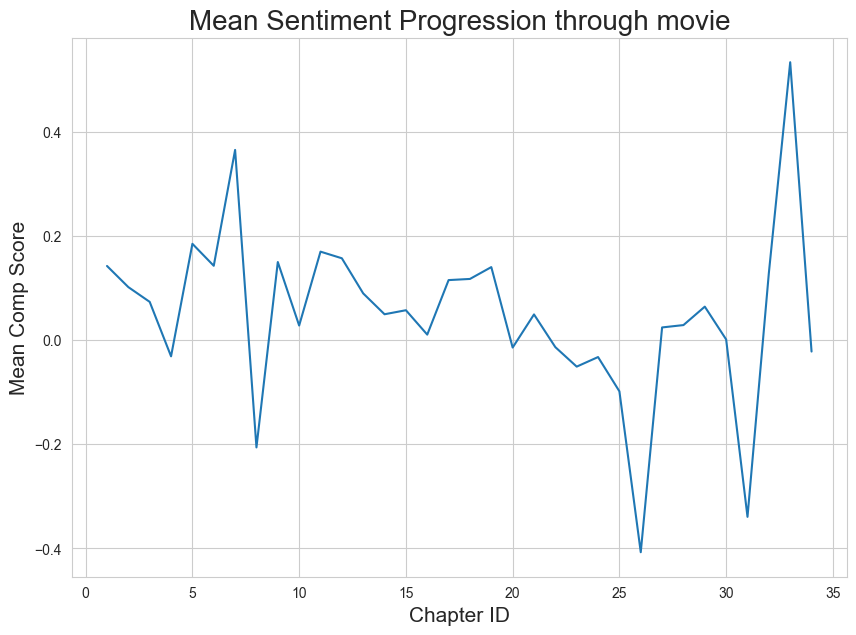

In [ ]:
#Sentimentanalyse der Kapitel aber mit allen Charakteren
scores = df.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
df["SentimentScore"] = scores
df["CompScore"] = df.SentimentScore.apply(lambda x: x.get("compound"))
df["PosScore"] = df.SentimentScore.apply(lambda x: x.get("pos"))
df["NegScore"] = df.SentimentScore.apply(lambda x: x.get("neg"))
df["NeuScore"] = df.SentimentScore.apply(lambda x: x.get("neu"))
df

sentimentchapter = pd.DataFrame(df.groupby("Chapter ID", as_index = False).CompScore.mean())
sentimentchapter

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.lineplot(x= "Chapter ID" ,y ="CompScore", data = sentimentchapter)
plt.xlabel("Chapter ID", fontsize = 15)
plt.ylabel("Mean Comp Score", fontsize = 15)
plt.title("Mean Sentiment Progression through movie", fontsize = 20)
plt.show()

#Chapter 1 nicht drinnen und sieht halt anders aus als in Kaggle Character Analysis

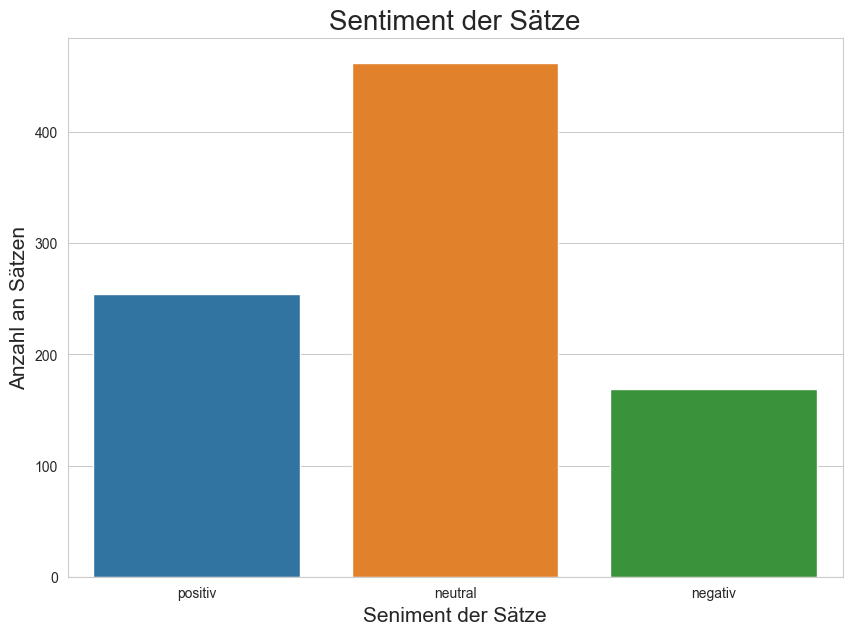

In [ ]:
#sentimentflags dazufügen
#film1
df["PosFlag"] = df.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df["NegFlag"] = df.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df["NeuFlag"] = df.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0) 
df

AnzahlposSätze = df["PosFlag"].sum()
AnzahlnegSätze = df["NegFlag"].sum()
AnzahlneuSätze = df["NeuFlag"].sum()

y = [AnzahlposSätze,AnzahlneuSätze,AnzahlnegSätze]
x = ["positiv","neutral", "negativ"]

sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x= x ,y = y )
plt.xlabel("Seniment der Sätze", fontsize = 15)
plt.ylabel("Anzahl an Sätzen", fontsize = 15)
plt.title("Sentiment der Sätze", fontsize = 20)
plt.show()



In [ ]:

PosTable = df[df["PosFlag"] == 1]
PosTable

NegTable = df[df["NegFlag"] ==1]
NegTable

PosList = PosTable["3withoutstopwords"]
PosList
NegList = NegTable["3withoutstopwords"]
NegList


from nltk.classify import NaiveBayesClassifier

PosSplit = int(PosTable.PosFlag.sum()/2)
NegSplit = int(NegTable.NegFlag.sum()/2)

train = 

#df["Dialogue"].classify()


3            [ah, professor, would, trust, hagrid, life]
6                [exactly, better, growing, away, ready]
8                            [good, luck, harry, potter]
9      [start, term, notices, wish, announce, first, ...
11     [sillllleeennnnceeeee, everyone, please, panic...
                             ...                        
865                                                [yay]
869    [merry, christmas, merry, christmas, ring, hog...
874             [harry, potter, leave, safe, good, luck]
878                                   [strength, enough]
882    [haha, bravery, parents, tell, harry, would, l...
Name: 3withoutstopwords, Length: 254, dtype: object


In [ ]:
#Emotional Sentiment Analyse

import text2emotion as te
import emoji

harry.info()
harry["Dialogue"] = harry["Dialogue"].astype( str)
harry
dialoge = ".".join(harry["Dialogue"])
dialoge.
te.get_emotion(dialoge)


# emotionen = []
# for line in df["3withoutstopwords"]:
#     for word in line:
#         emo = texemo.get_emotion(word)
#         print(emo)
#     keymax = max(emo,key = emo.get)
#     emotionen.append(keymax)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 200 to 441
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dialogue ID        242 non-null    int64 
 1   Chapter ID         242 non-null    int64 
 2   Place ID           242 non-null    int64 
 3   Character ID       242 non-null    int64 
 4   Dialogue           242 non-null    object
 5   3WordCountText     242 non-null    object
 6   3withoutstopwords  242 non-null    object
 7   Lemmitization      242 non-null    object
 8   Character Name     242 non-null    object
 9   Species            242 non-null    object
 10  Gender             242 non-null    object
 11  House              242 non-null    object
 12  Patronus           242 non-null    object
 13  Wand (Wood)        242 non-null    object
 14  Wand (Core)        242 non-null    object
dtypes: int64(4), object(11)
memory usage: 30.2+ KB


C:\Users\ACG\AppData\Local\Temp\ipykernel_9980\3914225968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harry["Dialogue"] = harry["Dialogue"].astype( str)


AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

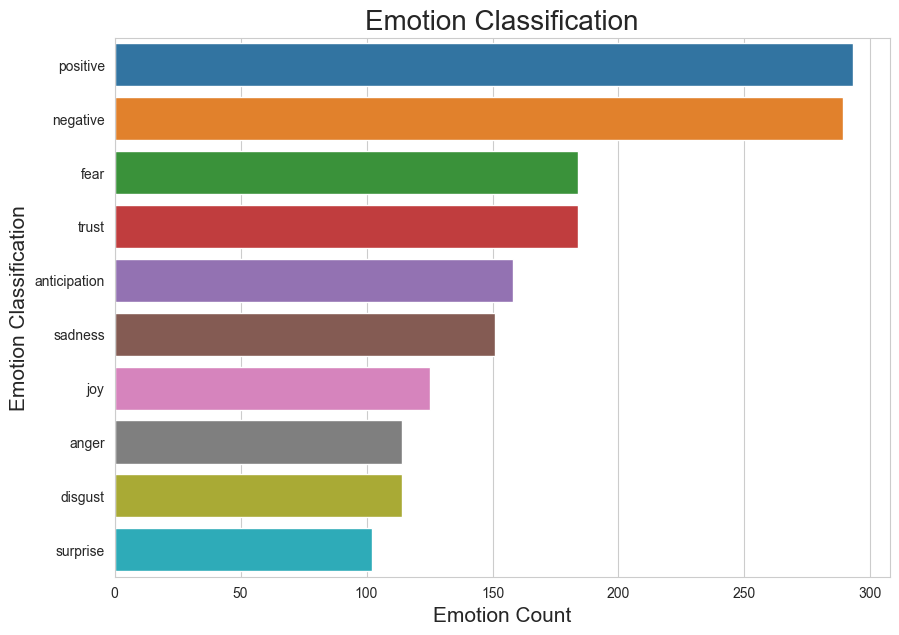

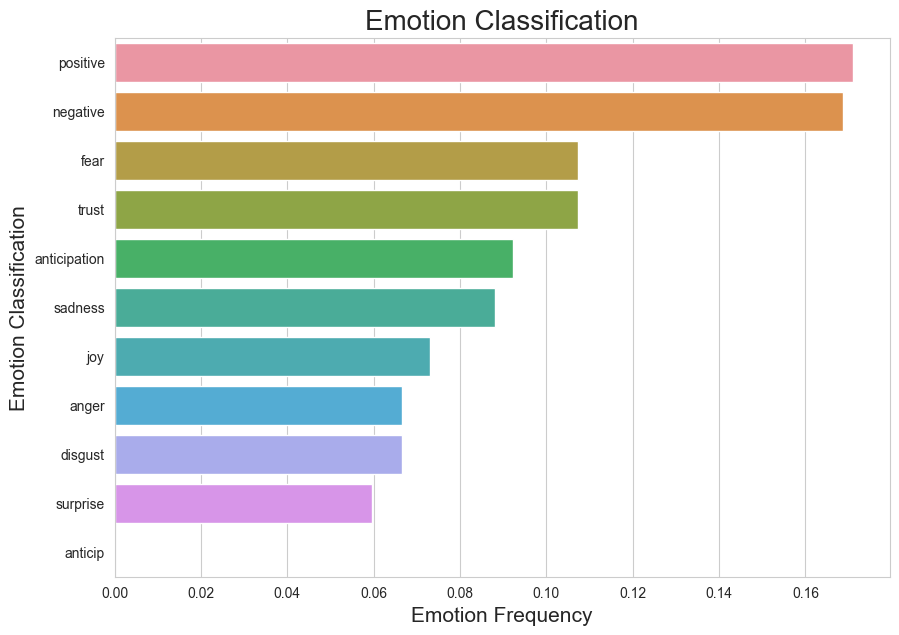

In [ ]:
from nrclex import NRCLex

str_dialoge = ",".join(df["Dialogue"])
str_dialoge
dialoge_object = NRCLex(str_dialoge)
dialoge_object


#pro Satz
data = dialoge_object.raw_emotion_scores
data

emotion_df = pd.DataFrame.from_dict(data,orient = "index")
emotion_df= emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={"index": "Emotion Classification", 0: "Emotion Count"})
emotion_df = emotion_df.sort_values(by = ["Emotion Count"], ascending =False)
emotion_df

sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x="Emotion Count" ,y = "Emotion Classification", data = emotion_df)
plt.xlabel("Emotion Count", fontsize = 15)
plt.ylabel("Emotion Classification", fontsize = 15)
plt.title("Emotion Classification", fontsize = 20)
plt.show()

#jedes Wort anschauen
dialoge_object.affect_dict
affect_df = pd.DataFrame.from_dict(dialoge_object.affect_dict, orient ="index")
affect_df

data1 = dialoge_object.affect_frequencies
frequencieemotion_df = pd.DataFrame.from_dict(data1,orient = "index")
frequencieemotion_df= frequencieemotion_df.reset_index()
frequencieemotion_df = frequencieemotion_df.rename(columns={"index": "Emotion Classification", 0: "Emotionfrequency"})
frequencieemotion_df = frequencieemotion_df.sort_values(by = ["Emotionfrequency"], ascending =False)
frequencieemotion_df
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x="Emotionfrequency" ,y = "Emotion Classification", data = frequencieemotion_df)
plt.xlabel("Emotion Frequency", fontsize = 15)
plt.ylabel("Emotion Classification", fontsize = 15)
plt.title("Emotion Classification", fontsize = 20)
plt.show()

In [ ]:
NRCLex.lexicon

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [ ]:
df

from itertools import combinations

charaktere = list(Charakter["Character Name"].str.lower())
charaktere

dialoge = df["3withoutstopwords"]
dialoge

char = []
score = []
umkreis = 50

for paar in combinations(charaktere,2):
    print(paar)


dialoge = df
combis = paar in combinations(charaktere,2)
combis

for paar in combinations(charaktere,2):
    zw_summe = 0
    if dialoge["Character Name"] == paar[0]:
        for k in [x for x in dialoge["3withoutstopwords"]]:
            if k == paar[1]:
                zw_summe = 1
    char.append(paar)
    score.append(zw_summe)


# for paar in combinations(charaktere,2):
#     zw_summe = 0
#     for i in range(len(dialoge)):
#         if dialoge[i] == paar[0]:
#             for k in [x for x in dialoge[i-umkreis:i+umkreis]]:
#                 if k == paar[1]:
#                     zw_summe = 1
#     char.append(paar)
#     score.append(zw_summe)

# hallo = pd.DataFrame({"char":char,"score":score})
# hallo


('harry potter', 'ron weasley')
('harry potter', 'hermione granger')
('harry potter', 'albus dumbledore')
('harry potter', 'rubeus hagrid')
('harry potter', 'severus snape')
('harry potter', 'minerva mcgonagall')
('harry potter', 'horace slughorn')
('harry potter', 'voldemort')
('harry potter', 'neville longbottom')
('harry potter', 'remus lupin')
('harry potter', 'draco malfoy')
('harry potter', 'alastor moody')
('harry potter', 'fred weasley')
('harry potter', 'dolores umbridge')
('harry potter', 'arthur weasley')
('harry potter', 'cornelius fudge')
('harry potter', 'sirius black')
('harry potter', 'george weasley')
('harry potter', 'ginny weasley')
('harry potter', 'vernon dursley')
('harry potter', 'bellatrix lestrange')
('harry potter', 'lucius malfoy')
('harry potter', 'tom riddle')
('harry potter', 'luna lovegood')
('harry potter', 'molly weasley')
('harry potter', 'dobby')
('harry potter', 'gilderoy lockhart')
('harry potter', 'seamus finnigan')
('harry potter', 'griphook')
('h

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().